# i. Perkenalan

Nama : Immanuel Yosia Alfrenco

---

Latar Belakang Masalah :

Pandemi covid-19 merupakan salah satu masalah yang cukup besar yang terjadi mulai dari awal tahun 2020. Pandemi covid-19 menyebar dengan cepat ke banyak negara sehingga menyebabkan banyak kerugian di berbagai sektor seperti wisata, transportasi, perekonomian negara, dan lain sebagainya. Dalam tugas ini saya akan menganalisa data penyebaran covid-19 di negara Jepang. 

---

Problem Statement :

Tingkat kematian di ibukota Jepang yaitu Tokyo adalah yang paling tinggi dibandingkan dengan kota lain di Jepang

# ii. Import Library

In [1]:
# Query yang digunakan dalam Google Cloud Platform
# SELECT * FROM `bigquery-public-data.covid19_jhu_csse_eu.summary` WHERE country_region = 'Japan' ORDER BY date

# iii. Data Loading

In [2]:
# Melakukan import library yang digunakan
import numpy as np
import pandas as pd

In [3]:
# Memasukan data csv yang akan digunakan
df = pd.read_csv('h8dsft_P0GC1_immanuel_yosia_alfrenco.csv')

In [4]:
# Mengetahui panjang data atau jumlah baris pada data
len(df)

39619

In [5]:
# Mengecek head dari dataframe
df.head()

,province_state,country_region,date,latitude,longitude,location_geom,confirmed,deaths,recovered,active,fips,admin2,combined_key
0,NaN,Japan,2020-01-22,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,Japan,2020-01-23,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,Japan,2020-01-24,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,Japan,2020-01-25,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,Japan,2020-01-26,NaN,NaN,NaN,4,NaN,1.0,NaN,NaN,NaN,NaN


In [6]:
# Mengecek tail dari dataframe
df.tail()

,province_state,country_region,date,latitude,longitude,location_geom,confirmed,deaths,recovered,active,fips,admin2,combined_key
39614,Unknown,Japan,2022-08-12,NaN,NaN,NaN,8,0.0,NaN,NaN,NaN,NaN,"Unknown, Japan"
39615,Wakayama,Japan,2022-08-12,33.911879,135.505446,POINT(135.505446 33.911879),85362,165.0,NaN,NaN,NaN,NaN,"Wakayama, Japan"
39616,Yamagata,Japan,2022-08-12,38.448396,140.102154,POINT(140.102154 38.448396),54348,113.0,NaN,NaN,NaN,NaN,"Yamagata, Japan"
39617,Yamaguchi,Japan,2022-08-12,34.201190,131.573293,POINT(131.573293 34.20119),94647,224.0,NaN,NaN,NaN,NaN,"Yamaguchi, Japan"
39618,Yamanashi,Japan,2022-08-12,35.612364,138.611489,POINT(138.611489 35.612364),64108,90.0,NaN,NaN,NaN,NaN,"Yamanashi, Japan"


Dilihat dari head dan tail ternyata terdapat banyak missing values pada data kita.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39619 entries, 0 to 39618
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   province_state  39492 non-null  object 
 1   country_region  39619 non-null  object 
 2   date            39619 non-null  object 
 3   latitude        37966 non-null  float64
 4   longitude       37966 non-null  float64
 5   location_geom   37966 non-null  object 
 6   confirmed       39619 non-null  int64  
 7   deaths          39609 non-null  float64
 8   recovered       21338 non-null  float64
 9   active          21247 non-null  float64
 10  fips            0 non-null      float64
 11  admin2          0 non-null      float64
 12  combined_key    39559 non-null  object 
dtypes: float64(7), int64(1), object(5)
memory usage: 3.9+ MB


Dari informasi di atas kita bisa melihat bahwa data kita memiliki 13 kolom dimana ada 5 kolom bertipe object/string dan 8 kolom bertipe numerical.

# iv. Data Cleaning

In [8]:
# Mengecek jumlah missing values tiap kolom
df.isnull().sum()

province_state      127
country_region        0
date                  0
latitude           1653
longitude          1653
location_geom      1653
confirmed             0
deaths               10
recovered         18281
active            18372
fips              39619
admin2            39619
combined_key         60
dtype: int64

Data kita ternyata memiliki banyak missing values yang harus kita handle. Terutama kita akan menghapus kolom `fips` dan `admin2` dimana kedua kolom tersebut tidak memiliki data sama sekali.

In [9]:
# Menghapus kolom fips dan admin2 karena tidak memiliki satupun data
df.drop(['fips', 'admin2'], axis=1, inplace = True)
df.isnull().sum()

province_state      127
country_region        0
date                  0
latitude           1653
longitude          1653
location_geom      1653
confirmed             0
deaths               10
recovered         18281
active            18372
combined_key         60
dtype: int64

Karena kita akan menganalisa data penyebaran berdasarkan kota, maka kita harus memastikan bahwa tidak ada missing values pada kolom kota dan mengecek isi kolom kota(`province_state`)

In [10]:
# Menghapus baris yang memiliki missing values pada province_state
df.dropna(subset = ['province_state'], inplace = True)
df.isnull().sum()

province_state        0
country_region        0
date                  0
latitude           1614
longitude          1614
location_geom      1614
confirmed             0
deaths                0
recovered         18277
active            18312
combined_key          0
dtype: int64

Sekarang sudah tidak ada lagi missing values pada kolom `province_state`.

In [11]:
median_lat = df['latitude'].median()
median_long = df['longitude'].median()
df['latitude'].fillna(median_lat, inplace=True)
df['longitude'].fillna(median_long, inplace=True)
df.isnull().sum()

province_state        0
country_region        0
date                  0
latitude              0
longitude             0
location_geom      1614
confirmed             0
deaths                0
recovered         18277
active            18312
combined_key          0
dtype: int64

Untuk `latitude` dan `longitude` yang berisi data numerik sudah kita ganti missing values dengan nilai mediannya.

In [12]:
df['location_geom'].fillna('unknown', inplace=True)
df.isnull().sum()

province_state        0
country_region        0
date                  0
latitude              0
longitude             0
location_geom         0
confirmed             0
deaths                0
recovered         18277
active            18312
combined_key          0
dtype: int64

Untuk `location_geom` yang memiliki tipe data object juga sudah kita ganti missing valuesnya dengan unknown.

In [13]:
df['recovered'].fillna(0, inplace=True)
df['active'].fillna(0, inplace=True)
df.isnull().sum().sum()

0

Untuk `recovered` dan `active` yang berisi data numerik sudah kita ganti dengan angka 0. Karena sudah tidak ada missing values maka kita bisa mulai mengeksplorasi data yang ada

# v. Eksplorasi Data

Setelah membersihkan missing values kita bisa mulai mengeksplorasi data. Kita bisa mulai dari melihat jumlah data tiap kota

Kita akan mengganti nama kolom 'province_state' menjadi 'city' dan 'country_region' menjadi 'country' agar mudah dibaca

In [14]:
df.rename(columns = {'province_state' : 'city', 'country_region' : 'country'}, inplace = True)
list(df)

['city',
 'country',
 'date',
 'latitude',
 'longitude',
 'location_geom',
 'confirmed',
 'deaths',
 'recovered',
 'active',
 'combined_key']

In [15]:
df['city'].value_counts().sort_index()

Aichi              807
Akita              807
Aomori             807
Chiba              807
Ehime              807
Fukui              807
Fukuoka            807
Fukushima          807
Gifu               807
Gunma              807
Hiroshima          807
Hokkaido           807
Hyogo              807
Ibaraki            807
Ishikawa           807
Iwate              756
Kagawa             807
Kagoshima          807
Kanagawa           807
Kochi              807
Kumamoto           807
Kyoto              807
Mie                807
Miyagi             807
Miyazaki           807
Nagano             807
Nagasaki           807
Nara               807
Niigata            807
Oita               807
Okayama            807
Okinawa            807
Osaka              807
Port Quarantine    807
Saga               807
Saitama            807
Shiga              807
Shimane            807
Shizuoka           807
Tochigi            807
Tokushima          807
Tokyo              807
Tottori            807
Toyama     

Pada data diatas ada nama kota Port Quarantine dimana itu adalah data covid-19 pada orang-orang yang dikarantina di kapal atau pelabuhan. 

Kita bisa mencari total kasus tertinggi di Jepang

In [16]:
df['confirmed'].max()

2521752

Ternyata kasus tertinggi di Jepang dalam sehari adalah 2521752.

Kita coba mencari rata-rata jumlah kematian di Jepang pada kasus covid-19

In [17]:
df['deaths'].mean()

284.30401093892436

Rata-rata kematian karna covid di Jepang adalah 284 kematian sehari.

Kita juga bisa mencari data kematian tertinggi tiap kota di Jepang

In [18]:
df.groupby('city')['deaths'].max()

city
Aichi              2310.0
Akita                83.0
Aomori              154.0
Chiba              2000.0
Ehime               187.0
Fukui                60.0
Fukuoka            1466.0
Fukushima           235.0
Gifu                397.0
Gunma               367.0
Hiroshima           548.0
Hokkaido           2225.0
Hyogo              2422.0
Ibaraki             507.0
Ishikawa            209.0
Iwate               125.0
Kagawa              185.0
Kagoshima           284.0
Kanagawa           2472.0
Kochi               150.0
Kumamoto            433.0
Kyoto               794.0
Mie                 375.0
Miyagi              240.0
Miyazaki            209.0
Nagano              227.0
Nagasaki            167.0
Nara                429.0
Niigata             103.0
Oita                208.0
Okayama             293.0
Okinawa             537.0
Osaka              5584.0
Port Quarantine       4.0
Saga                156.0
Saitama            1790.0
Shiga               252.0
Shimane              58.0
Shizuok

Melihat kota yang jumlah kematiannya di atas rata-rata kota lain

In [19]:
death_mean = df['deaths'].mean()
print(f'Rata-rata kematian = ' , round(death_mean))
df_filter = df['deaths']>death_mean
filtered_df = df[df_filter]
filtered_df.groupby('city')['deaths'].max()

Rata-rata kematian =  284


city
Aichi        2310.0
Chiba        2000.0
Fukuoka      1466.0
Gifu          397.0
Gunma         367.0
Hiroshima     548.0
Hokkaido     2225.0
Hyogo        2422.0
Ibaraki       507.0
Kanagawa     2472.0
Kumamoto      433.0
Kyoto         794.0
Mie           375.0
Nara          429.0
Okayama       293.0
Okinawa       537.0
Osaka        5584.0
Saitama      1790.0
Shizuoka      522.0
Tochigi       333.0
Tokyo        4856.0
Name: deaths, dtype: float64

Kita bisa melihat data dengan index tertentu

In [20]:
df.loc[10000:10010, ['city', 'date', 'confirmed', 'deaths']]

,city,date,confirmed,deaths
10000,Nagasaki,2020-12-16,345,3.0
10001,Nara,2020-12-16,1530,14.0
10002,Niigata,2020-12-16,418,3.0
10003,Oita,2020-12-16,543,3.0
10004,Okayama,2020-12-16,873,12.0
10005,Okinawa,2020-12-16,4886,80.0
10006,Osaka,2020-12-16,25817,384.0
10007,Port Quarantine,2020-12-16,1709,1.0
10008,Saga,2020-12-16,397,3.0
10009,Saitama,2020-12-16,10909,171.0


Kita juga bisa mencari data dengan tanggal tertentu

In [21]:
df.loc[df['date'] == '2020-09-01']

,city,country,date,latitude,longitude,location_geom,confirmed,deaths,recovered,active,combined_key
4780,Aichi,Japan,2020-09-01,35.035551,137.211621,POINT(137.211621 35.035551),4564,68.0,3706.0,790.0,"Aichi, Japan"
4781,Akita,Japan,2020-09-01,39.748679,140.408228,POINT(140.408228 39.748679),49,0.0,43.0,6.0,"Akita, Japan"
4782,Aomori,Japan,2020-09-01,40.781541,140.828896,POINT(140.828896 40.781541),38,1.0,32.0,5.0,"Aomori, Japan"
4783,Chiba,Japan,2020-09-01,35.510141,140.198917,POINT(140.198917 35.510141),3067,62.0,2568.0,437.0,"Chiba, Japan"
4784,Ehime,Japan,2020-09-01,33.624835,132.856842,POINT(132.856842 33.624835),114,6.0,106.0,2.0,"Ehime, Japan"
4785,Fukui,Japan,2020-09-01,35.846614,136.224654,POINT(136.224654 35.846614),232,8.0,152.0,72.0,"Fukui, Japan"
4786,Fukuoka,Japan,2020-09-01,33.526032,130.666949,POINT(130.666949 33.526032),4638,62.0,3604.0,972.0,"Fukuoka, Japan"
4787,Fukushima,Japan,2020-09-01,37.378867,140.223295,POINT(140.223295 37.378867),167,0.0,106.0,61.0,"Fukushima, Japan"
4788,Gifu,Japan,2020-09-01,35.778671,137.055925,POINT(137.055925 35.778671),558,10.0,519.0,29.0,"Gifu, Japan"
4789,Gunma,Japan,2020-09-01,36.504479,138.985605,POINT(138.985605 36.504479),445,19.0,338.0,88.0,"Gunma, Japan"


In [22]:
# Mencari data bulan ini
current_month = df[df['date'] > '2022-08-00']
current_month

,city,country,date,latitude,longitude,location_geom,confirmed,deaths,recovered,active,combined_key
39031,Aichi,Japan,2022-08-01,35.035551,137.211621,POINT(137.211621 35.035551),801137,2170.0,0.0,0.0,"Aichi, Japan"
39032,Akita,Japan,2022-08-01,39.748679,140.408228,POINT(140.408228 39.748679),45910,79.0,0.0,0.0,"Akita, Japan"
39033,Aomori,Japan,2022-08-01,40.781541,140.828896,POINT(140.828896 40.781541),92161,142.0,0.0,0.0,"Aomori, Japan"
39034,Chiba,Japan,2022-08-01,35.510141,140.198917,POINT(140.198917 35.510141),629498,1873.0,0.0,0.0,"Chiba, Japan"
39035,Ehime,Japan,2022-08-01,33.624835,132.856842,POINT(132.856842 33.624835),72268,152.0,0.0,0.0,"Ehime, Japan"
...,...,...,...,...,...,...,...,...,...,...,...
39614,Unknown,Japan,2022-08-12,35.215827,136.224654,unknown,8,0.0,0.0,0.0,"Unknown, Japan"
39615,Wakayama,Japan,2022-08-12,33.911879,135.505446,POINT(135.505446 33.911879),85362,165.0,0.0,0.0,"Wakayama, Japan"
39616,Yamagata,Japan,2022-08-12,38.448396,140.102154,POINT(140.102154 38.448396),54348,113.0,0.0,0.0,"Yamagata, Japan"
39617,Yamaguchi,Japan,2022-08-12,34.201190,131.573293,POINT(131.573293 34.20119),94647,224.0,0.0,0.0,"Yamaguchi, Japan"


Kita juga bisa mencari jumlah kematian setiap harinya di Jepang

In [23]:
df.groupby('date', sort = True)['deaths'].sum()

date
2020-05-28      881.0
2020-05-29      887.0
2020-05-30      894.0
2020-05-31      898.0
2020-06-01      899.0
               ...   
2022-08-08    33844.0
2022-08-09    34122.0
2022-08-10    34373.0
2022-08-11    34579.0
2022-08-12    34789.0
Name: deaths, Length: 807, dtype: float64

Kita bisa mencari kasus positif terkecil dari tiap kota

In [24]:
df.groupby('city', sort = True)['confirmed'].min()

city
Aichi               506
Akita                16
Aomori               27
Chiba               906
Ehime                82
Fukui               122
Fukuoka             701
Fukushima            81
Gifu                150
Gunma               149
Hiroshima           164
Hokkaido           1070
Hyogo               699
Ibaraki             168
Ishikawa            297
Iwate                 0
Kagawa               28
Kagoshima            10
Kanagawa           1349
Kochi                74
Kumamoto             47
Kyoto               358
Mie                  45
Miyagi               88
Miyazaki             17
Nagano               75
Nagasaki             17
Nara                 92
Niigata              82
Oita                 60
Okayama              25
Okinawa             145
Osaka              1782
Port Quarantine     180
Saga                 45
Saitama            1002
Shiga               100
Shimane              24
Shizuoka             75
Tochigi              65
Tokushima             5
Tokyo      

## Visualisasi data

In [25]:
%matplotlib inline
from matplotlib import pyplot as plt

Kita coba menampilkan jumlah kasus positif di kota Kyoto dari awal 2020 hingga sekarang

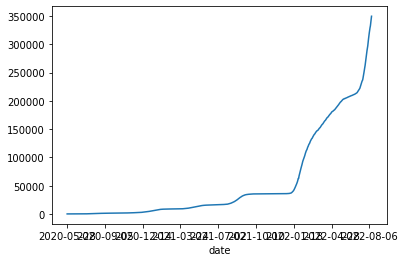

In [26]:
df[df['city'] == 'Kyoto'].groupby('date')['confirmed'].max().plot()

Kita juga bisa menampilkan jumlah kematian tertinggi setiap kota dalam bentuk pie chart

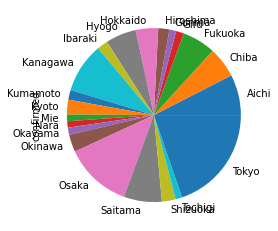

In [27]:
filtered_df.groupby('city')['confirmed'].max().plot(kind = 'pie')

Kita bisa menampilkan data tingkat kematian tiap kota di Jepang

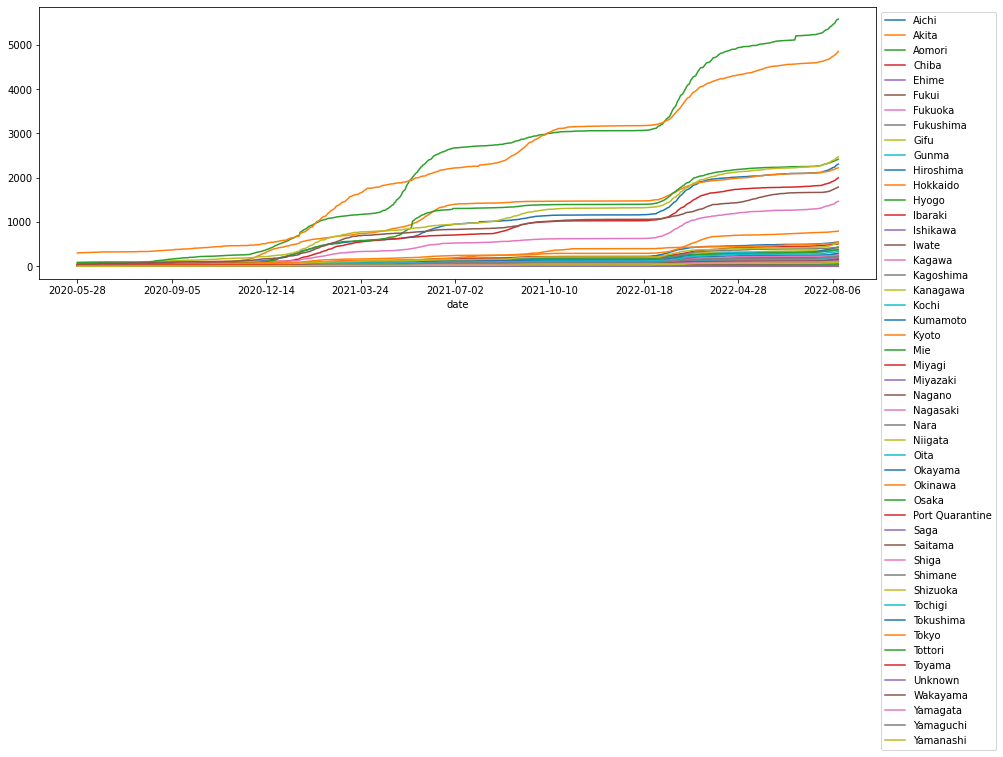

In [28]:
# menggunakan sumber https://stackoverflow.com/questions/17298313/python-pandas-convert-rows-as-column-headers


# kita membuat dataframe baru yang hanya berisi date, city, dan deaths
new_df = df[['date', 'city', 'deaths']].copy()
table = pd.pivot_table(new_df, values='deaths', index=['date'],
                    columns=['city'], aggfunc=np.sum) # mengubah bentuk dataframe supaya mudah dibuat plot
table.plot(figsize = (15, 5))
plt.legend(bbox_to_anchor=(1.0, 1.0))

Dari visualisasi diatas kita bisa menampilkan 2 kota dengan tingkat kematian tertinggi supaya lebih mudah dilihat yaitu perbandingan data jumlah kematian antara Tokyo dan Osaka

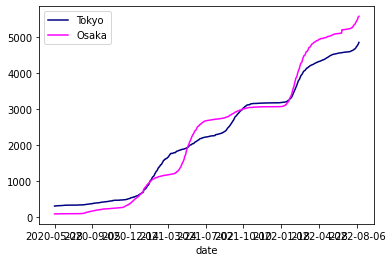

In [29]:
# menggunakan sumber dari https://stackoverflow.com/questions/13872533/plot-different-dataframes-in-the-same-figure
# menggunakan sumber dari https://stackoverflow.com/questions/33149428/modify-the-legend-of-pandas-bar-plot

ax = df[df['city'] == 'Tokyo'].groupby('date')['deaths'].max().plot(colormap = 'jet')
df[df['city'] == 'Osaka'].groupby('date')['deaths'].max().plot(ax=ax, colormap = 'spring')
plt.legend(['Tokyo', 'Osaka']);

Dari data diatas menunjukan ternyata Tokyo bukan merupakan kota dengan tingkat kematian tertinggi karena masih kalah dengan kota Osaka.

# vi. Kesimpulan



Setelah melakukan eksplorasi pada data yang ada dengan tujuan problem statement yaitu tingkat kematian karna covid-19 di kota Tokyo paling tinggi dari kota lain di Jepang ternyata salah. Menurut hasil visualisasi data, walaupun Tokyo merupakan kota terbesar dan juga kota dengan populasi terbanyak di Jepang ternyata sampai dengan bulan Agustus 2022 meskipun tingkat kematian di Tokyo lebih tinggi dibandingkan dengan mayoritas kota lain, ternyata tingkat kematian di kota Tokyo masih lebih rendah dibandingkan dengan tingkat kematian kota Osaka.